#Logistic regression on credit card to predict fraud or not

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("creditcard.csv")
pd.set_option('display.max_columns',100)
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76688,56699,-1.181207,-1.951604,3.063446,-1.738750,-0.918976,-0.381338,-1.333012,0.146660,-0.765473,0.593074,-1.723321,-1.341321,-0.896162,-1.573691,-2.033008,-0.988621,0.957287,0.221796,-0.252791,-0.019480,-0.045390,0.382562,-0.154181,0.397571,0.541051,-0.035650,-0.102007,-0.136118,50.0,0.0
76689,56701,0.894047,-0.088961,0.816240,1.471662,-0.848833,-0.960875,0.194649,-0.236176,-0.062260,-0.065993,0.250945,0.897485,0.951858,0.097327,0.973355,0.185295,-0.407139,-0.355453,-0.722835,0.204394,0.055551,-0.111830,-0.039957,0.933830,0.319871,-0.530666,0.013312,0.064450,150.0,0.0
76690,56701,0.894047,-0.088961,0.816240,1.471662,-0.848833,-0.960875,0.194649,-0.236176,-0.062260,-0.065993,0.250945,0.897485,0.951858,0.097327,0.973355,0.185295,-0.407139,-0.355453,-0.722835,0.204394,0.055551,-0.111830,-0.039957,0.933830,0.319871,-0.530666,0.013312,0.064450,150.0,0.0
76691,56701,1.168375,0.364349,0.975466,1.356315,-0.708786,-1.011976,0.006218,-0.199319,-0.045534,0.000145,0.248911,0.891636,0.926542,0.065178,0.955491,0.166566,-0.411349,-0.384547,-0.677481,-0.084783,-0.030491,-0.036884,0.085202,0.926543,0.372010,-0.515522,0.040142,0.039725,8.0,0.0
76692,56701,1.168375,0.364349,0.975466,1.356315,-0.708786,-1.011976,0.006218,-0.199319,-0.045534,0.000145,0.248911,0.891636,0.926542,0.065178,0.955491,0.166566,-0.411349,-0.384547,-0.677481,-0.084783,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.Class.groupby(df.Class).sum()

Class
0.0      0.0
1.0    186.0
Name: Class, dtype: float64

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [20]:
#df['V22'].mean()
df['V22']=df['V22'].fillna(df['V22'].mean())
df['V23']=df['V23'].fillna(df['V23'].mean())
df['V24']=df['V24'].fillna(df['V24'].mean())
df['V25']=df['V25'].fillna(df['V25'].mean())
df['V26']=df['V26'].fillna(df['V26'].mean())
df['V27']=df['V27'].fillna(df['V27'].mean())
df['V28']=df['V28'].fillna(df['V28'].mean())
df['Class']=df['Class'].fillna(df['Class'].mean())
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

In [21]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
#df['Class'].groupby(df['Class']).sum()
df['Class']=df['Class'].astype(int)

Class
0      0
1    186
Name: Class, dtype: int32

In [33]:
x=df.drop(columns='Class')
y=df['Class']
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
print(pred)

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]


In [38]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,Y_test)
print('Accuracy is:',acc)
from sklearn.metrics import classification_report
cr=classification_report(Y_test,pred)
print('Classification report:\n',cr)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
print('Confusion matrix:\n ', cm)

Accuracy is: 0.9982267654114947
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19126
           1       0.69      0.52      0.60        48

    accuracy                           1.00     19174
   macro avg       0.85      0.76      0.80     19174
weighted avg       1.00      1.00      1.00     19174

Confusion matrix:
  [[19115    11]
 [   23    25]]


In [35]:
#df.describe()

<BarContainer object of 19174 artists>

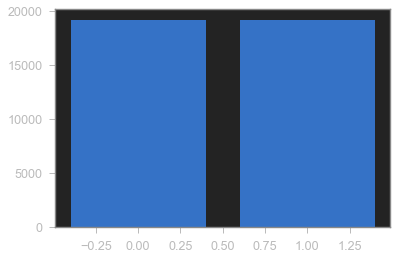

In [45]:
import matplotlib.pyplot as plt
plt.bar(pred,np.arange(len(pred)))